# Digit Recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%inline matplotlib

UsageError: Line magic function `%inline` not found.


In [2]:
import keras

Using TensorFlow backend.


#### Importing Dataset

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
X=train.iloc[:,1:]
y=train.iloc[:,0]

In [7]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [9]:
train_pixel=np.array(X)
train_pixel=train_pixel.reshape(train_pixel.shape[0],28,28,1)
test_pixel=np.array(test)
test_pixel=test_pixel.reshape(test.shape[0],28,28,1)

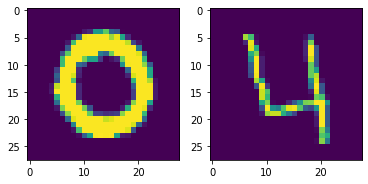

In [10]:
plt.subplot(1,2,1)
plt.imshow(train_pixel[1].reshape(28,28))
plt.subplot(1,2,2)
plt.imshow(train_pixel[3].reshape(28,28))


### Encoding The  Label Column

In [11]:
y= keras.utils.to_categorical(y,10)

In [12]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(train_pixel, y, test_size=0.33, random_state=42)

In [15]:
X_test.shape

(13860, 28, 28, 1)

In [16]:
y_test.shape



(13860, 10)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.metrics import accuracy

In [18]:
model=Sequential()


In [19]:
model.add(Convolution2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(strides=(2,2)))
model.add(Convolution2D(filters=16,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(strides=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          12816     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,batch_size=86)

Epoch 1/20
28140/28140 [==============================] - 15s 519us/step - loss: 1.5111 - accuracy: 0.6017
Epoch 2/20
28140/28140 [==============================] - 15s 518us/step - loss: 0.2873 - accuracy: 0.9168s - loss: 0.2905 
Epoch 3/20
28140/28140 [==============================] - 16s 572us/step - loss: 0.1750 - accuracy: 0.9503
Epoch 4/20
28140/28140 [==============================] - 15s 544us/step - loss: 0.1310 - accuracy: 0.9630
Epoch 5/20
28140/28140 [==============================] - 15s 526us/step - loss: 0.1108 - accuracy: 0.9689
Epoch 6/20
28140/28140 [==============================] - 15s 526us/step - loss: 0.0932 - accuracy: 0.9738
Epoch 7/20
28140/28140 [==============================] - 16s 582us/step - loss: 0.0833 - accuracy: 0.9761
Epoch 8/20
28140/28140 [==============================] - 16s 552us/step - loss: 0.0724 - accuracy: 0.9800
Epoch 9/20
28140/28140 [==============================] - 16s 567us/step - loss: 0.0686 - accuracy: 0.9804
Epoch 10/20
28140/28

In [21]:
loss,acc=model.evaluate(X_test,y_test)
print('loss:',loss)
print('accuracy:',acc)

13860/13860 [==============================] - 1s 92us/step
loss: 0.08564247953089185
accuracy: 0.9837662577629089


In [22]:
pred=model.predict(X_test)



In [23]:
pred_class=np.argmax(pred,axis=1)

In [24]:
pred_class

array([8, 1, 9, ..., 6, 3, 2], dtype=int64)

In [25]:
true_class=np.argmax(y_test,axis=1)

In [26]:
true_class

array([8, 1, 9, ..., 6, 3, 2], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion=confusion_matrix(true_class,pred_class)

In [29]:
import seaborn as sns

Text(0.5, 1, 'Confusion Matrix')

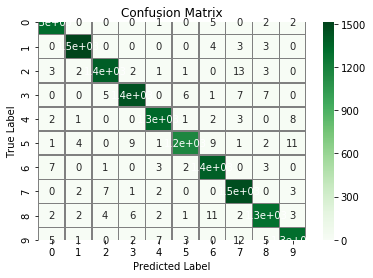

In [37]:
sns.heatmap(confusion,cmap="Greens",linewidths=0.5,linecolor='Gray',annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')


### Submission

In [38]:
sid=pd.read_csv('sample_submission.csv')

In [39]:
ids=sid.drop("Label",axis=1)

In [40]:
pred=model.predict(test_pixel)

In [41]:
pred_class=np.argmax(pred,axis=1)

In [42]:
output=pd.DataFrame({'ImageId':ids.ImageId , 'Label': pred_class})

In [43]:
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [44]:
output.to_csv('submission.csv',index= False)